20180119

In [12]:
import pickle
from Vision.TwoLayer import TwoLayerNet
from Vision.util import *
from PIL import Image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# 與學習有關的技巧

In [20]:
network = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
#修改輸入的值 preprocessing
def fix(x_train,t_train,x_test,t_test):    
    return x_train/255.0,one_hot_label(t_train,10),x_test/255.0,one_hot_label(t_test,10)
(x_train, t_train, x_test, t_test) = load_data(10000)
(x_train_aha, t_train_aha, x_test_aha, t_test_aha) = fix(x_train, t_train, x_test, t_test)
print(x_train_aha.shape)
print(t_train_aha.shape)
print(x_test_aha.shape)
print(t_test_aha.shape)

(10000, 784)
(10000, 10)
(60000, 784)
(60000, 10)


In [21]:
# meta parameter
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

In [22]:
def plot(train_acc_list, test_acc_list):
    markers = {'train': 'o', 'test': 's'}
    x = np.arange(len(train_acc_list))
    plt.plot(x, train_acc_list, label='train acc')
    plt.plot(x, test_acc_list, label='test acc', linestyle='--')
    plt.xlabel("epochs")
    plt.ylabel("accuracy")
    plt.ylim(0, 1.0)
    plt.legend(loc='lower right')
    plt.show()

train acc, test acc | 0.101000 , 0.102733
train acc, test acc | 0.190200 , 0.189483
train acc, test acc | 0.361500 , 0.358983
train acc, test acc | 0.630800 , 0.632817
train acc, test acc | 0.720800 , 0.719433
train acc, test acc | 0.778800 , 0.779583
train acc, test acc | 0.817800 , 0.821050
train acc, test acc | 0.835600 , 0.838000
train acc, test acc | 0.854100 , 0.857700
train acc, test acc | 0.864600 , 0.864967
train acc, test acc | 0.872300 , 0.873767
train acc, test acc | 0.880000 , 0.878400
train acc, test acc | 0.885300 , 0.884100
train acc, test acc | 0.887900 , 0.886017
train acc, test acc | 0.895100 , 0.891933
train acc, test acc | 0.895500 , 0.892650
train acc, test acc | 0.899100 , 0.895683
train acc, test acc | 0.900900 , 0.897650
train acc, test acc | 0.903500 , 0.898983
train acc, test acc | 0.903800 , 0.898850
train acc, test acc | 0.907000 , 0.900567
train acc, test acc | 0.907900 , 0.901483
train acc, test acc | 0.909400 , 0.903050
train acc, test acc | 0.910900 , 0

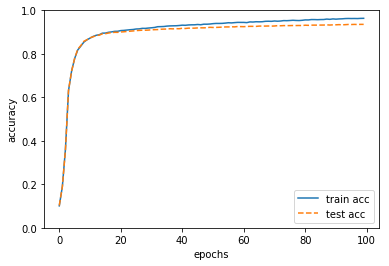

In [23]:
train_acc_list = []
test_acc_list = []
train_loss_list = []
iter_per_epoch = max(train_size / batch_size, 1)
for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train_aha[batch_mask]
    t_batch = t_train_aha[batch_mask]

    #計算梯度
    #grad = network.numerical_gradient(x_batch,t_batch) 好慢啊
    grad = network.gradient(x_batch, t_batch)

    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train_aha, t_train_aha)
        test_acc = network.accuracy(x_test_aha, t_test_aha)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | %f , %f" % (train_acc, test_acc))
plot(train_acc_list, test_acc_list)

## SGD
$$ \bf{W} = \bf{W} - \eta \frac{\partial \bf{L}}{\partial \bf{W}} $$

In [24]:
# https://github.com/oreilly-japan/deep-learning-from-scratch/blob/master/common/optimizer.py
class SGD:
    def __init__(self,lr =0.01):
        self.lr = lr
    def update(self, params,grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]        

train acc, test acc | 0.095300 , 0.097867
train acc, test acc | 0.106400 , 0.103817
train acc, test acc | 0.111400 , 0.112717
train acc, test acc | 0.111400 , 0.112717
train acc, test acc | 0.203200 , 0.204067
train acc, test acc | 0.111400 , 0.112717
train acc, test acc | 0.111400 , 0.112717
train acc, test acc | 0.169700 , 0.171417
train acc, test acc | 0.122700 , 0.123967
train acc, test acc | 0.189400 , 0.185100
train acc, test acc | 0.152300 , 0.155350
train acc, test acc | 0.185500 , 0.186133
train acc, test acc | 0.285100 , 0.283667
train acc, test acc | 0.432700 , 0.432800
train acc, test acc | 0.384800 , 0.383017
train acc, test acc | 0.364000 , 0.361650
train acc, test acc | 0.455200 , 0.454750
train acc, test acc | 0.406200 , 0.409233
train acc, test acc | 0.399400 , 0.399017
train acc, test acc | 0.403200 , 0.400100
train acc, test acc | 0.508900 , 0.510883
train acc, test acc | 0.463700 , 0.464983
train acc, test acc | 0.467200 , 0.463167
train acc, test acc | 0.476900 , 0

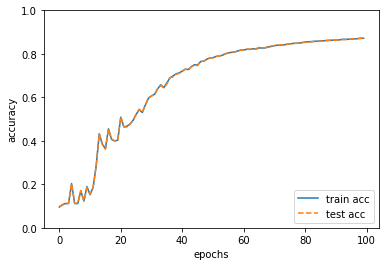

In [26]:
network = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)

train_acc_list = []
test_acc_list = []
train_loss_list = []
iter_per_epoch = max(train_size / batch_size, 1)
optimizer = SGD()
for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train_aha[batch_mask]
    t_batch = t_train_aha[batch_mask]

    #計算梯度
    #grad = network.numerical_gradient(x_batch,t_batch) 好慢啊
    grad = network.gradient(x_batch, t_batch)

    #for key in ('W1', 'b1', 'W2', 'b2'):
    #    network.params[key] -= learning_rate * grad[key]
    optimizer.update(network.params,grad)
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train_aha, t_train_aha)
        test_acc = network.accuracy(x_test_aha, t_test_aha)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | %f , %f" % (train_acc, test_acc))
plot(train_acc_list, test_acc_list)

## Momentum
$$ \bf{v} = \alpha\bf{v}-  \eta \frac{\partial \bf{L}}{\partial \bf{W}} $$ 
$$ \bf{W} = \bf{W} + \bf{v} $$

In [30]:
class Momentum:
    def __init__(self,lr=0.01,momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
    def update(self,params,grads):
        if self.v is None:
            self.v = {}
            for key,val in params.items():
                self.v[key] = np.zeros_like(val)
        for key in params.keys():
            self.v[key] = self.momentum*self.v[key] - self.lr*grads[key]
            params[key] += self.v[key]

train acc, test acc | 0.089500 , 0.090300
train acc, test acc | 0.102100 , 0.099483
train acc, test acc | 0.395700 , 0.400400
train acc, test acc | 0.613400 , 0.611200
train acc, test acc | 0.648500 , 0.645783
train acc, test acc | 0.748200 , 0.749133
train acc, test acc | 0.803800 , 0.804683
train acc, test acc | 0.828400 , 0.828133
train acc, test acc | 0.844200 , 0.843817
train acc, test acc | 0.859800 , 0.860083
train acc, test acc | 0.867400 , 0.866900
train acc, test acc | 0.876900 , 0.876050
train acc, test acc | 0.882500 , 0.881217
train acc, test acc | 0.884300 , 0.882233
train acc, test acc | 0.888900 , 0.886083
train acc, test acc | 0.891000 , 0.888500
train acc, test acc | 0.896400 , 0.893500
train acc, test acc | 0.900500 , 0.896433
train acc, test acc | 0.901200 , 0.897667
train acc, test acc | 0.902300 , 0.897367
train acc, test acc | 0.905100 , 0.899583
train acc, test acc | 0.907700 , 0.901200
train acc, test acc | 0.909000 , 0.902967
train acc, test acc | 0.910200 , 0

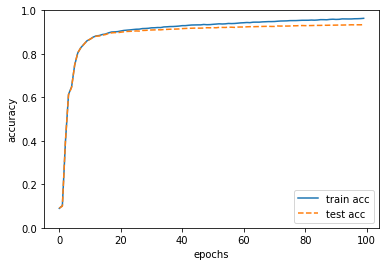

In [31]:
network = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)

train_acc_list = []
test_acc_list = []
train_loss_list = []
iter_per_epoch = max(train_size / batch_size, 1)
optimizer = Momentum()
for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train_aha[batch_mask]
    t_batch = t_train_aha[batch_mask]

    #計算梯度
    #grad = network.numerical_gradient(x_batch,t_batch) 好慢啊
    grad = network.gradient(x_batch, t_batch)

    #for key in ('W1', 'b1', 'W2', 'b2'):
    #    network.params[key] -= learning_rate * grad[key]
    optimizer.update(network.params,grad)
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train_aha, t_train_aha)
        test_acc = network.accuracy(x_test_aha, t_test_aha)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | %f , %f" % (train_acc, test_acc))
plot(train_acc_list, test_acc_list)

## AdaGrad
$$ h = h + \eta \frac{\partial \bf{L}}{\partial \bf{W}} * \eta \frac{\partial \bf{L}}{\partial \bf{W}} $$
$$ \bf{W} = \bf{W} - \eta \frac{1}{\sqrt{\bf{h}}} \frac{\partial \bf{L}}{\partial \bf{W}} $$
其中h 是過去所有梯度的平方和，表示如果越大，學習率就會越低，可以更快速專研到位置

In [51]:
class AdaGrad:
    def __init__(self,lr=0.01):
        self.lr = lr
        self.h = None

    def update(self,params,grads):
        if self.h is None:
            self.h ={}
            for key,val in params.items():
                self.h[key] = np.zeros_like(val)
        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key])+1e-7)

train acc, test acc | 0.170100 , 0.165150
train acc, test acc | 0.836300 , 0.831417
train acc, test acc | 0.878900 , 0.876967
train acc, test acc | 0.893900 , 0.889833
train acc, test acc | 0.901700 , 0.897583
train acc, test acc | 0.907800 , 0.902067
train acc, test acc | 0.911000 , 0.904783
train acc, test acc | 0.914900 , 0.907483
train acc, test acc | 0.917800 , 0.909883
train acc, test acc | 0.920700 , 0.912367
train acc, test acc | 0.924600 , 0.913633
train acc, test acc | 0.925600 , 0.915000
train acc, test acc | 0.927500 , 0.916150
train acc, test acc | 0.930900 , 0.917817
train acc, test acc | 0.931600 , 0.918617
train acc, test acc | 0.932300 , 0.919283
train acc, test acc | 0.934600 , 0.920617
train acc, test acc | 0.935800 , 0.920567
train acc, test acc | 0.937100 , 0.921817
train acc, test acc | 0.937900 , 0.922050
train acc, test acc | 0.939900 , 0.922800
train acc, test acc | 0.941000 , 0.923533
train acc, test acc | 0.940500 , 0.923550
train acc, test acc | 0.943200 , 0

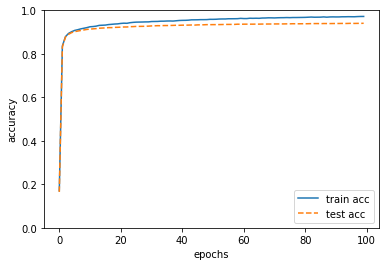

In [52]:
network = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)

train_acc_list = []
test_acc_list = []
train_loss_list = []
iter_per_epoch = max(train_size / batch_size, 1)
optimizer = AdaGrad()
for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train_aha[batch_mask]
    t_batch = t_train_aha[batch_mask]

    #計算梯度
    #grad = network.numerical_gradient(x_batch,t_batch) 好慢啊
    grad = network.gradient(x_batch, t_batch)

    #for key in ('W1', 'b1', 'W2', 'b2'):
    #    network.params[key] -= learning_rate * grad[key]
    optimizer.update(network.params,grad)
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train_aha, t_train_aha)
        test_acc = network.accuracy(x_test_aha, t_test_aha)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | %f , %f" % (train_acc, test_acc))
plot(train_acc_list, test_acc_list)

In [41]:
optimizer.lr

AttributeError: 'AdaGrad' object has no attribute 'lr'

In [46]:
optimizer.update

AttributeError: 'AdaGrad' object has no attribute 'h'